# In this lab, we will first take a look at the degree of imbalance in the data and correct it using the techniques we learned on the class.

### Import the required libraries and modules that you would need.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime
import math as m
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, fbeta_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek


### Read that data into Python and call the dataframe churnData.


In [2]:
churn_data=pd.read_csv("customer_churn.csv")
churn_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


###  Check the datatypes of all the columns in the data. You would see that the column TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function.

In [3]:
#check categorical values
churn_cat=churn_data.select_dtypes(object)
churn_cat.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes


In [4]:
#check numerical values
churn_num=churn_data.select_dtypes(include=np.number)
churn_num

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70
...,...,...,...
7038,0,24,84.80
7039,0,72,103.20
7040,0,11,29.60
7041,1,4,74.40


### Check for null values in the dataframe. Replace the null values.


In [5]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
## Converting the blank values in nans
churn_data = churn_data.replace(r'\s+',np.nan,regex=True).replace('',np.nan)


In [7]:
churn_data.isna().sum()

customerID             0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines        682
InternetService     3096
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
Contract            3168
PaperlessBilling       0
PaymentMethod       7043
MonthlyCharges         0
TotalCharges          11
Churn                  0
dtype: int64

### TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function.


In [8]:
churn_cat=pd.to_numeric(churn_cat["TotalCharges"],errors="coerce")
churn_cat.info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7032 non-null   float64
dtypes: float64(1)
memory usage: 55.1 KB


In [9]:
## I Replace the Nan values of the column 'TotalCharges' by the mean of the same column
#churn_data['TotalCharges'].fillna((churn_data['TotalCharges'].median), inplace = True)
churn_data['TotalCharges'].fillna((churn_data['TotalCharges'].median), inplace = True)

churn_data['TotalCharges'].isna().sum()

0

### Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:


In [10]:
X = churn_data.loc[: ,["tenure","MonthlyCharges","SeniorCitizen"]]
X

,tenure,MonthlyCharges,SeniorCitizen
0,1,29.85,0
1,34,56.95,0
2,2,53.85,0
3,45,42.30,0
4,2,70.70,0
...,...,...,...
7038,24,84.80,0
7039,72,103.20,0
7040,11,29.60,0
7041,4,74.40,1


In [11]:
y = churn_data.loc[: ,["Churn"]]


### Scale the features either by using normalizer or a standard scaler.


In [12]:
#when i try to scale give an error this error: TypeError: float() argument must be a string or a number, not 'method'
# so I decided to drop "total charges"

scaler = StandardScaler()

X = scaler.fit_transform(X)

### Split the data into a training set and a test set.


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

In [14]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
#sanity check
print("Nb of rows of X_train = {}".format(len(X_train)))
print("Nb of rows of X_test = {}".format(len(X_test)))
print("Nb of rows of y_train = {}".format(len(y_train)))
print("Nb of rows of y_test = {}".format(len(y_test)))

Nb of rows of X_train = 5634
Nb of rows of X_test = 1409
Nb of rows of y_train = 5634
Nb of rows of y_test = 1409


### checking the imbalance

In [16]:
y_train.value_counts(normalize=True)


Churn
No       0.733582
Yes      0.266418
dtype: float64

In [17]:
y_test.value_counts(normalize=True)


Churn
No       0.738822
Yes      0.261178
dtype: float64

### fit a logistic regression

In [19]:
from sklearn.linear_model import LogisticRegression


In [20]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

/Users/sammy/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [21]:
pred_train = classifier.predict(X_train)
pred_test = classifier.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

/Users/sammy/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


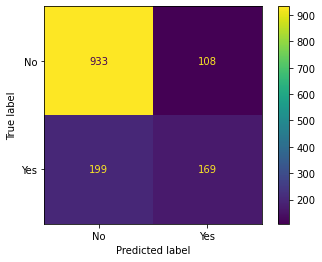

The accuracy of the model in the train set is:  0.7917997870074548
The accuracy of the model in the test set is:  0.7821149751596878


In [23]:
cm = confusion_matrix(y_test, pred_test)
matrix = plot_confusion_matrix(classifier, X_test, y_test)
plt.show()
    
print('The accuracy of the model in the train set is: ', accuracy_score(y_train, pred_train))
print('The accuracy of the model in the test set is: ', accuracy_score(y_test, pred_test))

### Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.


# upsampling

In [24]:
sm = SMOTE(k_neighbors=3)

X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train, y_train)

In [25]:
print(X_train.shape)
print(X_train_SMOTE.shape)

(5634, 3)
(8266, 3)


In [26]:
y_train.value_counts()/len(y_train)


Churn
No       0.733582
Yes      0.266418
dtype: float64

In [27]:
y_train_SMOTE.value_counts()/len(y_train_SMOTE)


Churn
No       0.5
Yes      0.5
dtype: float64

/Users/sammy/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sammy/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


REPORT ON TEST SET

               precision    recall  f1-score   support

          No       0.88      0.72      0.79      1041
         Yes       0.47      0.72      0.57       368

    accuracy                           0.72      1409
   macro avg       0.68      0.72      0.68      1409
weighted avg       0.77      0.72      0.73      1409



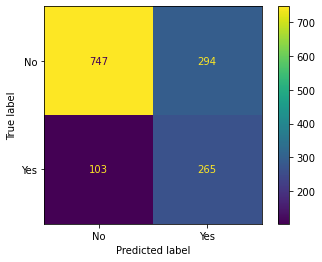

The accuracy of the model in the train set is:  0.6852165497217517
The accuracy of the model in the test set is:  0.7821149751596878


In [28]:
logistic_regression_report(X_train_SMOTE, y_train_SMOTE)

pred_train_SMOTE = classifier.predict(X_train_SMOTE)
pred_test_SMOTE = classifier.predict(X_test)
print('The accuracy of the model in the train set is: ', accuracy_score(y_train_SMOTE, pred_train_SMOTE))
print('The accuracy of the model in the test set is: ', accuracy_score(y_test, pred_test_SMOTE))

### downsampling

In [29]:
tl = TomekLinks(sampling_strategy='all')
X_train_TL, y_train_TL = tl.fit_resample(X_train, y_train)


REPORT ON TEST SET

               precision    recall  f1-score   support

          No       0.82      0.90      0.86      1041
         Yes       0.61      0.46      0.52       368

    accuracy                           0.78      1409
   macro avg       0.72      0.68      0.69      1409
weighted avg       0.77      0.78      0.77      1409



/Users/sammy/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sammy/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


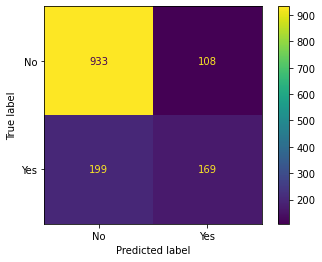

In [32]:
logistic_regression_report(X_train_TL, y_train_TL)


### With the method downsampling, The Accuracy and Precision decrease and Recall are higher.So the model performs better to correct  the minority class label to get the imbalanced data.